In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import PolynomialFeatures

c:\users\administrator\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\administrator\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
X = np.arange(3).reshape(3, 1)
X

array([[0],
       [1],
       [2]])

In [3]:
poly = PolynomialFeatures(1)
poly.fit_transform(X)

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [4]:
poly = PolynomialFeatures(1, include_bias=False)
poly.fit_transform(X)

array([[0.],
       [1.],
       [2.]])

In [5]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)


array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 2., 4.]])

In [6]:
poly = PolynomialFeatures(4)
poly.fit_transform(X)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8., 16.]])

In [7]:
X2 = np.arange(6).reshape(3, 2)
X2

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
poly = PolynomialFeatures(1)
poly.fit_transform(X2)

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.]])

In [9]:

poly = PolynomialFeatures(2)
poly.fit_transform(X2)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [10]:
poly = PolynomialFeatures(3)
poly.fit_transform(X2)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [12]:
df = pd.read_csv('universal_datasets/skincancer.txt',
                 delim_whitespace=True,
                 header=0,
                 names=['state', 'lat', 'mort', 'ocean', 'long'])
df.head()

,state,lat,mort,ocean,long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


In [13]:
X = df['lat'].to_frame()
y = df['mort']

In [14]:
from sklearn.model_selection import train_test_split

c:\users\administrator\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

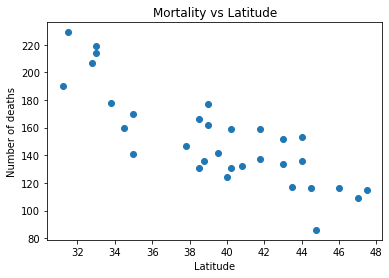

In [16]:
plt.scatter(X_train, y_train)
plt.title("Mortality vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Number of deaths");

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [18]:
polynomial_features = PolynomialFeatures(degree=1,
                                         include_bias=False)

In [19]:
linear_regression = LinearRegression()

In [20]:
pipeline = Pipeline([("poly_f", polynomial_features),
                     ("linear_r", linear_regression)])

In [21]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly_f',
                 PolynomialFeatures(degree=1, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_r',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [22]:
y_test = pipeline.predict(X_test)

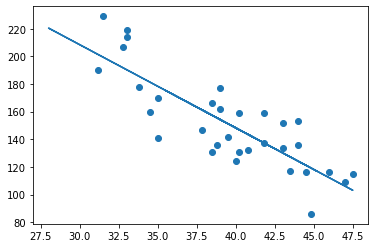

In [23]:
plt.plot(X_test, y_test, label="Model")
plt.scatter(X_train, y_train)

In [24]:
# Overfitting and Underfitting
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [25]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [26]:
np.random.seed(0)

n_samples = 30

x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1

In [27]:
X = x[:, np.newaxis]

X[:5]

array([[0.0202184 ],
       [0.07103606],
       [0.0871293 ],
       [0.11827443],
       [0.14335329]])

In [28]:
y[:5]

array([1.0819082 , 0.87027612, 1.14386208, 0.70322051, 0.78494746])

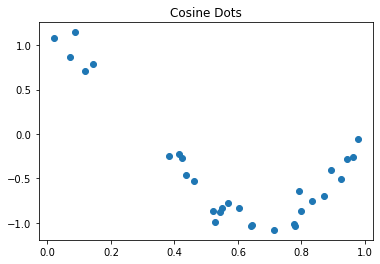

In [29]:
plt.scatter(X, y)
plt.title("Cosine Dots");

In [30]:
X_test = np.linspace(0.05, 1, 100)[:, np.newaxis]

In [31]:
polynomial_features = PolynomialFeatures(degree=1,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

In [32]:
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [33]:
y_test = pipeline.predict(X_test)

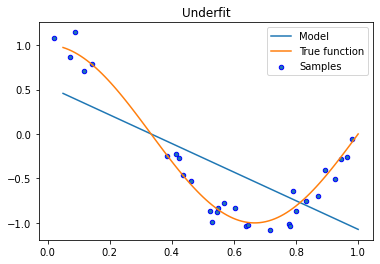

In [34]:
plt.plot(X_test, y_test, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")

plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend()
plt.title("Underfit");


In [35]:
polynomial_features = PolynomialFeatures(degree=4,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

In [36]:
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [37]:
y_test = pipeline.predict(X_test)


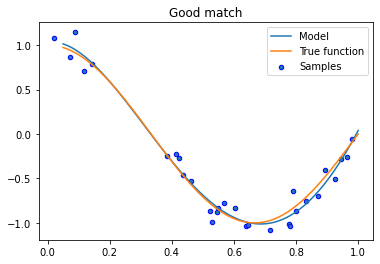

In [38]:
plt.plot(X_test, y_test, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend()
plt.title("Good match");

In [39]:
polynomial_features = PolynomialFeatures(degree=15,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

In [40]:
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [41]:
y_test = pipeline.predict(X_test)

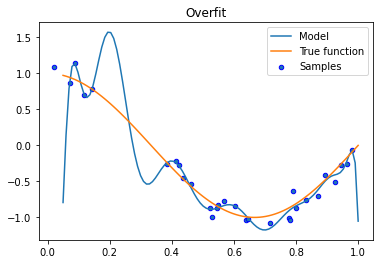

In [42]:
plt.plot(X_test, y_test, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend()
plt.title("Overfit");